## Segmenting and Clustering Neighborhoods in Toronto
### Project overview
This project explores, segments and clusters the neighborhoods in the city of Toronto. Following are the steps followed.

- For the Toronto neighborhood data, we scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and transform the data into a pandas dataframe
- We then get the latitude and the longitude coordinates of each neighborhood and append to the dataframe
- Finally we use KMeans to explore and cluster the neighborhoods in the city of Toronto

In [123]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

print('Libraries imported.')

Libraries imported.


### 1. Obtain postcode data

In [2]:
#read table from link and conver to dataframe 
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df = df[0]
df = df[df.Borough != 'Not assigned'].reset_index(drop=True)

#Club neighborhoods with same postcode
df2 = pd.DataFrame({'Postcode':df.Postcode.unique()})
df2['Borough']=pd.DataFrame(list(set(df['Borough'].loc[df['Postcode'] == x['Postcode']])) for i, x in df2.iterrows())
df2['Neighborhood']=pd.Series(list(set(df['Neighbourhood'].loc[df['Postcode'] == x['Postcode']])) for i, x in df2.iterrows())
df2['Neighborhood']=df2['Neighborhood'].apply(lambda x: ', '.join(x))
df2.iloc[4,2] = df2.iloc[4,1]
df2.head()

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


In [3]:
#print the number of rows of dataframe
df2.shape

(103, 3)

### 2. Add latitude and the longitude coordinates

In [81]:
#read coordinates data
df3= pd.read_csv("http://cocl.us/Geospatial_data")
df3.rename(columns={'Postal Code':'Postcode'}, inplace=True)
df3.set_index("Postcode")
df2.set_index("Postcode")
df_toronto = pd.merge(df2, df3)
print(df_toronto.shape)
df_toronto

(103, 5)


,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


### 3.  Cluster the neighborhoods in the city of Toronto
#### 3.1 Use geopy library to get the latitude and longitude values of Toronto

In [5]:
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON, Canada are 43.653963, -79.387207.


#### 3.1 Create a map of Toronto with neighborhoods superimposed on top

In [6]:
# install folium library
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-3.1.0               |           py36_0         724 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

In [7]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

![Toronto Neighborhoods](/toronto%21.JPG)

Define Foursquare Credentials and Version

In [9]:
#foursquare credentials
CLIENT_ID = 'xxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#### 3.2 Explore neighborhoods in Toronto

Create a function to get 100 venues in 500m radius for all the neighborhoods in Toronto

In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [13]:
# type your answer here

toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront, Regent Park
Lawrence Heights, Lawrence Manor
Queen's Park
Islington Avenue
Rouge, Malvern
Don Mills North
Woodbine Gardens, Parkview Hill
Ryerson, Garden District
Glencairn
Islington, Martin Grove, Princess Gardens, Cloverdale, West Deane Park
Port Union, Rouge Hill, Highland Creek
Don Mills South, Flemingdon Park
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Old Burnhamthorpe, Bloordale Gardens, Markland Wood
West Hill, Guildwood, Morningside
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Wilson Heights, Bathurst Manor, Downsview North
Thorncliffe Park
Adelaide, King, Richmond
Dufferin, Dovercourt Village
Scarborough Village
Oriole, Henry Farm, Fairview
York University, Northwood Park
East Toronto
Union Station, Toronto Islands, Harbourfront East
Trinity, Little Portugal
East Birchmount Park, Kennedy Park, Ionview
Bayview Village
CFB Toronto, Downsview East
River

Check size of the resulting dataframe

In [14]:
print(toronto_venues.shape)
toronto_venues.head()

(2250, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


Check how many venues were returned for each neighborhood

In [15]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
Bayview Village,4,4,4,4,4,4
Berczy Park,56,56,56,56,56,56
"Birch Cliff, Cliffside West",4,4,4,4,4,4
Business Reply Mail Processing Centre 969 Eastern,18,18,18,18,18,18
"CFB Toronto, Downsview East",3,3,3,3,3,3
Caledonia-Fairbanks,6,6,6,6,6,6
Canada Post Gateway Processing Centre,11,11,11,11,11,11


Unique categories that can be curated from all the returned venues

In [17]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 281 uniques categories.


#### 3.3  Analyze Each Neighborhood

In [47]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot = toronto_onehot.drop('Neighborhood', axis=1)

# add neighborhood column back to dataframe
toronto_onehot.insert(0,'Neighborhood', toronto_venues['Neighborhood'].values) 

toronto_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's St

Examine the new dataframe size.

In [48]:
toronto_onehot.shape

(2250, 281)

Group rows by neighborhood by taking the mean of the frequency of occurrence of each category

In [50]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's St

Confirm the new size

In [51]:
toronto_grouped.shape

(100, 281)

Write a function to sort the venues in descending order.

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood.

In [122]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Bar,Thai Restaurant,Gym,Hotel,Breakfast Spot,Asian Restaurant,Restaurant
1,Agincourt,Lounge,Furniture / Home Store,Breakfast Spot,Skating Rink,Donut Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant
2,Bayview Village,Japanese Restaurant,Café,Bank,Chinese Restaurant,Yoga Studio,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant
3,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Cheese Shop,Bakery,Beer Bar,Seafood Restaurant,Café,Steakhouse,Park
4,"Birch Cliff, Cliffside West",College Stadium,Café,Skating Rink,General Entertainment,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dive Bar


### 4. Cluster Neighborhoods

Run k-means to cluster the neighborhood and select best k.

In [121]:
Ks =20
kclusters = np.zeros((Ks-1))
inertia = np.zeros((Ks-1))
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

for n in range(1,Ks):

    # run k-means clustering
    kmean = KMeans(n_clusters=n, random_state=0).fit(toronto_grouped_clustering)
    inertia[n-1] = kmean.inertia_

inertia

array([19.98052575, 18.44716085, 17.21528621, 16.39747225, 15.23728874,
       14.26066702, 13.73936315, 13.04057407, 12.44456759, 11.43101369,
       10.97349176, 10.82993684, 10.4462954 ,  9.84194602,  9.64838776,
        9.09760879,  9.04222576,  8.70334605,  8.32809605])

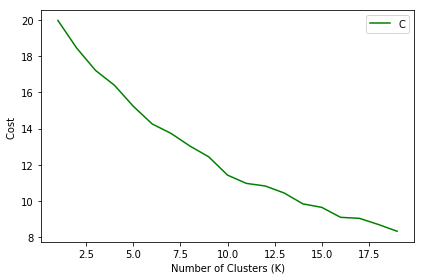

In [124]:
plt.plot(range(1,Ks),inertia,'g')
plt.ylabel('Cost ')
plt.xlabel('Number of Clusters (K)')
plt.tight_layout()
plt.show()

In [125]:
# set number of clusters
kclusters_final = 20

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters_final, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([5, 5, 1, 5, 5, 5, 9, 2, 3, 5], dtype=int32)

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [126]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [127]:
toronto_merged = df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#drop neighorhoods with no Foursquare data
toronto_merged = toronto_merged[pd.notnull(toronto_merged['Cluster Labels'])].reset_index(drop= True)
toronto_merged = toronto_merged.astype({'Cluster Labels': 'int64'})
toronto_merged.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,2,Park,Fast Food Restaurant,Food & Drink Shop,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run
1,M4A,North York,Victoria Village,43.725882,-79.315572,3,Hockey Arena,Intersection,Coffee Shop,Portuguese Restaurant,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,3,Coffee Shop,Park,Pub,Café,Bakery,Theater,Gym / Fitness Center,Mexican Restaurant,Restaurant,Breakfast Spot
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,5,Furniture / Home Store,Accessories Store,Boutique,Fraternity House,Event Space,Miscellaneous Shop,Coffee Shop,Clothing Store,Women's Store,Vietnamese Restaurant
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494,3,Coffee Shop,Park,Gym,Yoga Studio,Diner,Chinese Restaurant,Sandwich Place,Bar,Café,Portuguese Restaurant


Visualize the resulting clusters

In [128]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_final)
ys = [i + x + (i*x)**2 for i in range(kclusters_final)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<img src="m.png" width="800" />

### 5. Examine Clusters

Examine each cluster and determine the discriminating venue categories that distinguish each cluster.

#### **Cluster 1**

In [129]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Etobicoke,0,Bank,Yoga Studio,Donut Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Dessert Shop


#### **Cluster 2**

In [130]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,North York,1,Gym / Fitness Center,Café,Caribbean Restaurant,Japanese Restaurant,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doner Restaurant
9,North York,1,Park,Sushi Restaurant,Asian Restaurant,Pub,Japanese Restaurant,Dive Bar,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
15,York,1,Park,Field,Trail,Hockey Arena,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Deli / Bodega
18,East Toronto,1,Trail,Health Food Store,Pub,Yoga Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run
38,North York,1,Japanese Restaurant,Café,Bank,Chinese Restaurant,Yoga Studio,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant
66,Central Toronto,1,Trail,Mexican Restaurant,Sushi Restaurant,Jewelry Store,Yoga Studio,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run
81,Central Toronto,1,Trail,Playground,Tennis Court,Summer Camp,Restaurant,Drugstore,Donut Shop,Dumpling Restaurant,Doner Restaurant,Dog Run


#### **Cluster 3**

In [131]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,2,Park,Fast Food Restaurant,Food & Drink Shop,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run
20,York,2,Park,Market,Women's Store,Pharmacy,Fast Food Restaurant,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dive Bar


#### **Cluster 4**

In [132]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,3,Hockey Arena,Intersection,Coffee Shop,Portuguese Restaurant,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run
2,Downtown Toronto,3,Coffee Shop,Park,Pub,Café,Bakery,Theater,Gym / Fitness Center,Mexican Restaurant,Restaurant,Breakfast Spot
4,Queen's Park,3,Coffee Shop,Park,Gym,Yoga Studio,Diner,Chinese Restaurant,Sandwich Place,Bar,Café,Portuguese Restaurant
21,Scarborough,3,Coffee Shop,Insurance Office,Korean Restaurant,Yoga Studio,Donut Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant
33,North York,3,Falafel Restaurant,Coffee Shop,Furniture / Home Store,Bar,Massage Studio,Miscellaneous Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
37,Scarborough,3,Department Store,Coffee Shop,Playground,Discount Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dog Run
74,Mississauga,3,Hotel,Coffee Shop,Gym / Fitness Center,American Restaurant,Middle Eastern Restaurant,Sandwich Place,Mediterranean Restaurant,Burrito Place,Fried Chicken Joint,Doner Restaurant
84,Central Toronto,3,Pub,Coffee Shop,Pizza Place,Liquor Store,Sports Bar,Restaurant,Supermarket,Sushi Restaurant,Bagel Shop,Fried Chicken Joint


#### **Cluster 5**

In [133]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,North York,4,Empanada Restaurant,Yoga Studio,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Drugstore


#### **Cluster 6**

In [137]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,North York,5,Furniture / Home Store,Accessories Store,Boutique,Fraternity House,Event Space,Miscellaneous Shop,Coffee Shop,Clothing Store,Women's Store,Vietnamese Restaurant
8,Downtown Toronto,5,Coffee Shop,Clothing Store,Cosmetics Shop,Fast Food Restaurant,Café,Middle Eastern Restaurant,Italian Restaurant,Restaurant,Bookstore,Ramen Restaurant
12,North York,5,Grocery Store,Gym,Coffee Shop,Beer Store,Italian Restaurant,Clothing Store,Chinese Restaurant,Dim Sum Restaurant,Restaurant,Discount Store
13,East York,5,Cosmetics Shop,Park,Bus Stop,Skating Rink,Pharmacy,Video Store,Curling Ice,Beer Store,Asian Restaurant,Dog Run
14,Downtown Toronto,5,Coffee Shop,Hotel,Café,Restaurant,Italian Restaurant,Cocktail Bar,Beer Bar,Cosmetics Shop,Clothing Store,Breakfast Spot
17,Scarborough,5,Electronics Store,Pizza Place,Rental Car Location,Intersection,Medical Center,Mexican Restaurant,Breakfast Spot,Spa,Drugstore,Donut Shop
19,Downtown Toronto,5,Coffee Shop,Cocktail Bar,Farmers Market,Cheese Shop,Bakery,Beer Bar,Seafood Restaurant,Café,Steakhouse,Park
22,East York,5,Coffee Shop,Sporting Goods Shop,Sushi Restaurant,Furniture / Home Store,Burger Joint,Supermarket,Fish & Chips Shop,Sports Bar,Beer Store,Bike Shop
23,Downtown Toronto,5,Coffee Shop,Italian Restaurant,Ice Cream Shop,Café,Burger Joint,Sandwich Place,Middle Eastern Restaurant,Bubble Tea Shop,Salad Place,Indian Restaurant
24,Downtown Toronto,5,Grocery Store,Café,Park,Italian Restaurant,Restaurant,Baby Store,Nightclub,Coffee Shop,Convenience Store,Diner


#### **Cluster 7**

In [138]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,6,Fast Food Restaurant,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Department Store


#### **Cluster 8**

In [139]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,North York,7,Cafeteria,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Department Store


#### **Cluster 9**

In [140]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 8, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
92,Etobicoke,8,Rental Car Location,Drugstore,Yoga Studio,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doner Restaurant


#### **Cluster 10**

In [141]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 9, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,North York,9,Park,Airport,Playground,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run
83,Scarborough,9,Park,Playground,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doner Restaurant
89,Downtown Toronto,9,Park,Trail,Playground,Building,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run


#### **Cluster 11**

In [142]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 10, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,North York,10,Baseball Field,Yoga Studio,Donut Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Dessert Shop
98,Etobicoke,10,Pool,Baseball Field,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Yoga Studio


#### **Cluster 12**

In [143]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 11, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,North York,11,Piano Bar,Yoga Studio,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop


#### **Cluster 13**

In [144]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 12, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Scarborough,12,Bar,History Museum,Yoga Studio,Donut Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Drugstore


#### **Cluster 14**

In [145]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 13, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,East York,13,Park,Convenience Store,Pizza Place,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant
64,North York,13,Park,Bank,Convenience Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop
75,Etobicoke,13,Park,Pizza Place,Bus Line,Mobile Phone Shop,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar
95,Etobicoke,13,Park,River,College Rec Center,Deli / Bodega,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop


#### **Cluster 15**

In [146]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 14, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Scarborough,14,American Restaurant,Motel,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Yoga Studio


#### **Cluster 16**

In [147]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 15, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,North York,15,Park,Bakery,Construction & Landscaping,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop


#### **Cluster 17**

In [148]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 16, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,Central Toronto,16,Pool,Home Service,Garden,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Yoga Studio


#### **Cluster 18**

In [149]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 17, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,York,17,Grocery Store,Pizza Place,Bus Line,Convenience Store,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dive Bar


#### **Cluster 19**

In [150]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 18, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Scarborough,18,Grocery Store,Playground,Yoga Studio,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run


#### **Cluster 20**

In [151]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 19, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,East York,19,Fast Food Restaurant,Pizza Place,Gym / Fitness Center,Intersection,Athletics & Sports,Café,Gastropub,Pharmacy,Pet Store,Bank
16,Etobicoke,19,Convenience Store,Café,Liquor Store,Pharmacy,Pizza Place,Coffee Shop,Beer Store,Doner Restaurant,Diner,Discount Store
28,East York,19,Indian Restaurant,Burger Joint,Yoga Studio,Bank,Grocery Store,Gym,Liquor Store,Coffee Shop,Pharmacy,Pizza Place
68,Etobicoke,19,Pizza Place,Middle Eastern Restaurant,Intersection,Coffee Shop,Sandwich Place,Chinese Restaurant,Yoga Studio,Dive Bar,Dim Sum Restaurant,Diner
70,North York,19,Grocery Store,Pharmacy,Pizza Place,Coffee Shop,Discount Store,Yoga Studio,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant
72,Central Toronto,19,Sandwich Place,Coffee Shop,Café,Pizza Place,Park,Burger Joint,Jewish Restaurant,Flower Shop,Indian Restaurant,Pub
80,Scarborough,19,Pizza Place,Bank,Italian Restaurant,Noodle House,Pharmacy,Shopping Mall,Fast Food Restaurant,Fried Chicken Joint,Chinese Restaurant,Thai Restaurant
87,Etobicoke,19,Grocery Store,Pizza Place,Fried Chicken Joint,Sandwich Place,Fast Food Restaurant,Beer Store,Coffee Shop,Pharmacy,Drugstore,Donut Shop
91,Etobicoke,19,Pizza Place,Gym,Pool,Coffee Shop,Skating Rink,Pharmacy,Pub,Sandwich Place,Deli / Bodega,Department Store
